# Pg 371 - Chapter 11: How to make predictions with a multiple regression model

In [1]:
# Import the pandas and seaborn library

import pandas as pd
import seaborn as sns


## Pg 372 - The Cars dataset

In [2]:
# Pg 373 - Pull in the cars.csv data

carsData = pd.read_csv('cars.csv')


In [3]:
# Pg 373 - Display the first five lines.

carsData.head()


,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
# Pg 373 - The columns of the Cars dataset

carsData.info(memory_usage = 'deep')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

<AxesSubplot:>

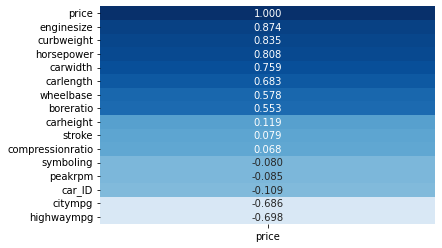

In [5]:
# Pg 373 - A heatmap for the correlations with price

sns.heatmap(data=carsData.corr()[['price']].sort_values('price', ascending=False), 
            annot=True, cmap='Blues', vmin=-1.0, vmax=1.0, cbar=False, fmt='.3f')


# Pg 374 - How to create a simple regression model

In [6]:
# Pg 375 - Import the SciKit-learn classes

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [7]:
# Pg 375 - Step 1: split the data into the training and test datasets

x_train, x_test, y_train, y_test = train_test_split(
    carsData[['enginesize']], carsData[['price']],
    test_size=0.20, random_state=20)


In [8]:
# Pg 375 - Step 2: Create the model from the training dataset.

model = LinearRegression()
model.fit(x_train, y_train)


LinearRegression()

In [9]:
# Pg 375 - Step 3: Score the model for the test dataset.

model.score(x_test,y_test)


0.7063964117029844

In [10]:
# Pg 375 - Step 4: Score the model for the training dataset.

model.score(x_train, y_train)


0.766524123801206

In [11]:
# Pg 375 - Use the model to make predictions from the test dataset.

y_predicted = model.predict(x_test)


In [12]:
# Pg 375 - How to create a DataFrame for the predicted and actual prices.

# create DataFrame for the price predictions
predicted = pd.DataFrame(y_predicted, columns=['predictedPrice'])

# combine the test data and the predicted data into a frame
final = predicted.join([x_test.reset_index(drop=True), 
                        y_test.reset_index(drop=True)])

# display the first five lines of the new comined DataFrame; but just three columns.
final[['enginesize','price','predictedPrice']].head()


,enginesize,price,predictedPrice
0,136,15250.0,14905.920686
1,90,8916.5,7164.387613
2,92,8778.0,7500.976007
3,203,31400.5,26181.631901
4,92,6488.0,7500.976007


## Pg 376 - How to plot the residuals of a simple regression

In [13]:
# Pg 377 - Calculate the residuals

final['residual'] = final.price - final.predictedPrice

# display the first five lines of the revised DataFrame.
final.head()


,predictedPrice,enginesize,price,residual
0,14905.920686,136,15250.0,344.079314
1,7164.387613,90,8916.5,1752.112387
2,7500.976007,92,8778.0,1277.023993
3,26181.631901,203,31400.5,5218.868099
4,7500.976007,92,6488.0,-1012.976007


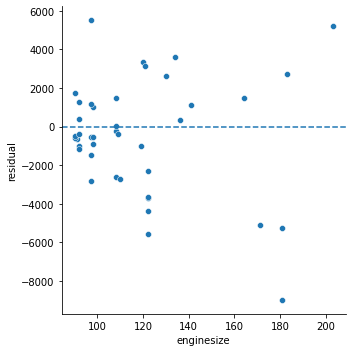

In [14]:
# Pg 377 - How to plot the residuals with a scatter plot.

g = sns.relplot(data=final, x='enginesize', y='residual', kind='scatter')
for ax in g.axes.flat:
    ax.axhline(0, ls='--');
    

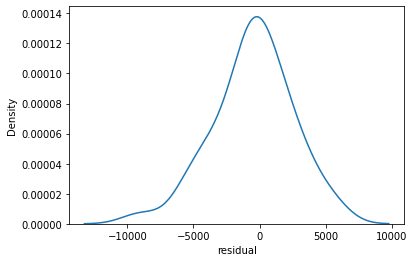

In [15]:
# Pg 377 - How to plot the distribution of the residuals.

sns.kdeplot(data=final, x='residual');


In [16]:
# playing with a concept

std_data = final['residual'].std()

print(f'One Standard Deviation (STD) = {std_data:.0f}')


One Standard Deviation (STD) = 2984


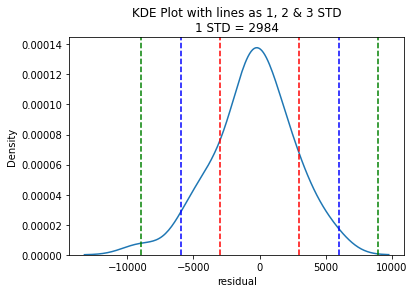

In [17]:
# playing with a concept

graph = sns.kdeplot(data = final, x = 'residual')

graph.axvline(-3 * std_data, ls = '--', color = 'green')
graph.axvline(-2 * std_data, ls = '--', color = 'blue')
graph.axvline(-1 * std_data, ls = '--', color = 'red')
graph.axvline(1 * std_data, ls = '--', color = 'red')
graph.axvline(2 * std_data, ls = '--', color = 'blue')
graph.axvline(3 * std_data, ls = '--', color = 'green')
graph.set(title = f'KDE Plot with lines as 1, 2 & 3 STD\n1 STD = {std_data:.0f}');



# Pg 378 - How to create a multiple regression model

In [18]:
# Pg 379 - How to create a multiple regression model, with two variables.

# Pg 379 - Step 1: split the data into the training and test datasets

x_train, x_test, y_train, y_test = train_test_split(
    carsData[['enginesize','curbweight']], carsData[['price']], 
    test_size=0.20, random_state=20)


In [19]:
# Pg 379 - Step 2: Create the model from the training dataset.

model = LinearRegression()
model.fit(x_train, y_train)


LinearRegression()

In [20]:
# Pg 379 - Step 3: Score the model for the test dataset.

model.score(x_test, y_test)


0.7581072748679533

In [21]:
# Pg 379 - Step 4: Score the model for the training dataset.

model.score(x_train, y_train)


0.7950435284247739

In [22]:
# Pg 379 - Use the model to make predictions from the test dataset.

y_predicted = model.predict(x_test)


In [23]:
# Pg 379 - How to create a DataFrame for the predicted and actual prices

# create the DataFrame for the price predictions
predicted = pd.DataFrame(y_predicted, columns=['predictedPrice'])

# combine the test data and the predicted data into a DataFrame
final = predicted.join([x_test.reset_index(drop=True), 
                        y_test.reset_index(drop=True)])

# display the first five lines of the new comined DataFrame; but just four columns.
final.head()[['enginesize','curbweight','price','predictedPrice']]

,enginesize,curbweight,price,predictedPrice
0,136,2507,15250.0,14186.974331
1,90,1874,8916.5,5681.243299
2,92,3110,8778.0,12256.116157
3,203,3366,31400.5,26252.387995
4,92,2015,6488.0,6633.723732


## Pg 380 - How to plot the residuals of a multiple regression

In [24]:
# Pg 381 - Calculate the residuals

final['residual'] = final.price - final.predictedPrice

# display the first five lines of the revised DataFrame.
final.head()


,predictedPrice,enginesize,curbweight,price,residual
0,14186.974331,136,2507,15250.0,1063.025669
1,5681.243299,90,1874,8916.5,3235.256701
2,12256.116157,92,3110,8778.0,-3478.116157
3,26252.387995,203,3366,31400.5,5148.112005
4,6633.723732,92,2015,6488.0,-145.723732


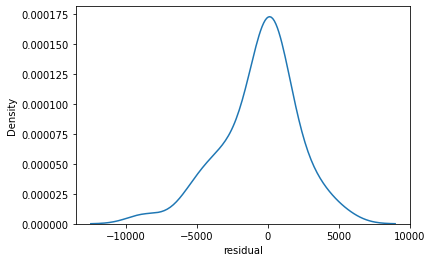

In [25]:
# Pg 381 - How to plot the distribution of the residuals.

sns.kdeplot(data=final, x='residual');


In [26]:
# playing with a concept

std_data = final['residual'].std()

print(f'One Standard Deviation (STD) = {std_data:.0f}')


One Standard Deviation (STD) = 2677


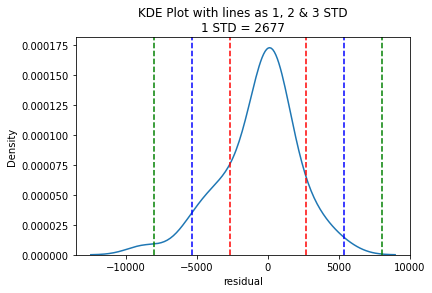

In [27]:
# playing with a concept

graph = sns.kdeplot(data = final, x = 'residual')

graph.axvline(-3 * std_data, ls = '--', color = 'green')
graph.axvline(-2 * std_data, ls = '--', color = 'blue')
graph.axvline(-1 * std_data, ls = '--', color = 'red')
graph.axvline(1 * std_data, ls = '--', color = 'red')
graph.axvline(2 * std_data, ls = '--', color = 'blue')
graph.axvline(3 * std_data, ls = '--', color = 'green')
graph.set(title = f'KDE Plot with lines as 1, 2 & 3 STD\n1 STD = {std_data:.0f}');


## Pg 382 - How to identify categorical variables

In [28]:
# Pg 383 - How to identify the different types of categorical data

carsData.nunique()


car_ID              205
symboling             6
CarName             147
fueltype              2
aspiration            2
doornumber            2
carbody               5
drivewheel            3
enginelocation        2
wheelbase            53
carlength            75
carwidth             44
carheight            49
curbweight          171
enginetype            7
cylindernumber        7
enginesize           44
fuelsystem            8
boreratio            38
stroke               37
compressionratio     32
horsepower           59
peakrpm              23
citympg              29
highwaympg           30
price               189
dtype: int64

## Pg 384 - How to review categorical variables

### Pg 385 - Dichotomous variables

In [29]:
carsData.enginelocation.value_counts()

front    202
rear       3
Name: enginelocation, dtype: int64

In [30]:
carsData.fueltype.value_counts()

gas       185
diesel     20
Name: fueltype, dtype: int64

In [31]:
carsData.aspiration.value_counts()

std      168
turbo     37
Name: aspiration, dtype: int64

In [32]:
carsData.doornumber.value_counts()

four    115
two      90
Name: doornumber, dtype: int64

### Pg 385 - Nominal variables

In [33]:
carsData.fuelsystem.value_counts()

mpfi    94
2bbl    66
idi     20
1bbl    11
spdi     9
4bbl     3
mfi      1
spfi     1
Name: fuelsystem, dtype: int64

In [34]:
carsData.carbody.value_counts()

sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: carbody, dtype: int64

In [35]:
carsData.drivewheel.value_counts()

fwd    120
rwd     76
4wd      9
Name: drivewheel, dtype: int64

In [36]:
carsData.enginetype.value_counts()

ohc      148
ohcf      15
ohcv      13
dohc      12
l         12
rotor      4
dohcv      1
Name: enginetype, dtype: int64

In [37]:
carsData.cylindernumber.value_counts()

four      159
six        24
five       11
eight       5
two         4
three       1
twelve      1
Name: cylindernumber, dtype: int64

## Pg 386 - How to create dummy variables

In [38]:
# Pg 387 - How to create dummy varialbles for the categorical columns

catColumns = ['aspiration','doornumber','carbody','drivewheel']
dummies = pd.get_dummies(carsData[catColumns])
dummies.info(memory_usage = 'deep')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   aspiration_std       205 non-null    uint8
 1   aspiration_turbo     205 non-null    uint8
 2   doornumber_four      205 non-null    uint8
 3   doornumber_two       205 non-null    uint8
 4   carbody_convertible  205 non-null    uint8
 5   carbody_hardtop      205 non-null    uint8
 6   carbody_hatchback    205 non-null    uint8
 7   carbody_sedan        205 non-null    uint8
 8   carbody_wagon        205 non-null    uint8
 9   drivewheel_4wd       205 non-null    uint8
 10  drivewheel_fwd       205 non-null    uint8
 11  drivewheel_rwd       205 non-null    uint8
dtypes: uint8(12)
memory usage: 2.5 KB


In [39]:
# Pg 387 - How to combine the numeric data with the dummy varialbles.

carsDummies = carsData.drop(columns=catColumns)
carsDummies = carsDummies.join(dummies)
carsDummies.info(memory_usage = 'deep')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 34 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   car_ID               205 non-null    int64  
 1   symboling            205 non-null    int64  
 2   CarName              205 non-null    object 
 3   fueltype             205 non-null    object 
 4   enginelocation       205 non-null    object 
 5   wheelbase            205 non-null    float64
 6   carlength            205 non-null    float64
 7   carwidth             205 non-null    float64
 8   carheight            205 non-null    float64
 9   curbweight           205 non-null    int64  
 10  enginetype           205 non-null    object 
 11  cylindernumber       205 non-null    object 
 12  enginesize           205 non-null    int64  
 13  fuelsystem           205 non-null    object 
 14  boreratio            205 non-null    float64
 15  stroke               205 non-null    flo

## Pg 388 - How to rescale the data and check the correlations

In [40]:
# Pg 389 - How to rescale the data

# import additional SciKit-learn class
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numCols = ['wheelbase','carlength','carwidth','carheight','curbweight',
           'enginesize','boreratio','stroke','compressionratio','horsepower',
           'peakrpm','citympg','highwaympg']
carsDummies[numCols] = scaler.fit_transform(carsDummies[numCols])

# display the first five lines of the new DataFrame.
carsDummies.head()


,car_ID,symboling,CarName,fueltype,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,...,doornumber_four,doornumber_two,carbody_convertible,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_4wd,drivewheel_fwd,drivewheel_rwd
0,1,3,alfa-romero giulia,gas,front,-1.690772,-0.426521,-0.844782,-2.020417,-0.014566,...,0,1,1,0,0,0,0,0,0,1
1,2,3,alfa-romero stelvio,gas,front,-1.690772,-0.426521,-0.844782,-2.020417,-0.014566,...,0,1,1,0,0,0,0,0,0,1
2,3,1,alfa-romero Quadrifoglio,gas,front,-0.708596,-0.231513,-0.190566,-0.543527,0.514882,...,0,1,0,0,1,0,0,0,0,1
3,4,2,audi 100 ls,gas,front,0.173698,0.207256,0.136542,0.235942,-0.420797,...,1,0,0,0,0,1,0,0,1,0
4,5,2,audi 100ls,gas,front,0.107110,0.207256,0.230001,0.235942,0.516807,...,1,0,0,0,0,1,0,1,0,0


In [41]:
# Pg 389 - How to check the correlations in the rescaled data.

carsDummies.corr()[['price']].sort_values(by='price', ascending=False)


,price
price,1.000000
enginesize,0.874145
curbweight,0.835305
horsepower,0.808139
carwidth,0.759325
carlength,0.682920
drivewheel_rwd,0.638957
wheelbase,0.577816
boreratio,0.553173
carbody_hardtop,0.225854


## Pg 390 - How to create a multiple regression that includes dummy variables

In [42]:
# Pg 391 - How to create a multiple regression model that includes dummy variables.

# Pg 391 - Step 1: split the data into the training and test datasets

carsTrain, carsTest = train_test_split(carsDummies, test_size=0.2, 
    random_state=20)


In [43]:
# Pg 391 - Step 2: create the multiple regression model

model = LinearRegression()
xCols = ['enginesize','horsepower','curbweight', 'carlength',
         'drivewheel_rwd','highwaympg']
model.fit(carsTrain[xCols], carsTrain['price'])


LinearRegression()

In [44]:
# Pg 391 - Step 3: score the model with the test dataset

model.score(carsTest[xCols], carsTest['price'])


0.7825698705477578

In [45]:
# Pg 391 - Step 4: score the model with the training dataset

model.score(carsTrain[xCols], carsTrain['price'])


0.8225579104775009

In [46]:
# Pg 391 - Use the model to make predictions

y_predicted = model.predict(carsTest[xCols])

In [47]:
# Pg 391 - How to create a DataFrame for the predicted and actual prices

predicted = pd.DataFrame(y_predicted, columns=['predictedPrice'])

final = predicted.join([carsTest[xCols].reset_index(drop=True),
                        carsTest['price'].reset_index(drop=True)])

finalCols = xCols + ['price', 'predictedPrice']

# display the first five lines of the new comined DataFrame; but just selected columns.
# final[['enginesize','horsepower','carwidth','drivewheel_rwd',
  #      'highwaympg','price','predictedPrice']].head()
    
final[finalCols].head()    

,enginesize,horsepower,curbweight,carlength,drivewheel_rwd,highwaympg,price,predictedPrice
0,0.218885,0.149133,-0.093502,0.264133,0,-0.837195,15250.0,13503.029634
1,-0.888455,-0.864871,-1.312196,-1.474692,0,1.783034,8916.5,5717.963598
2,-0.840310,-1.067671,1.067433,-0.353393,0,0.181783,8778.0,8501.389419
3,1.831749,4.661448,1.560301,0.134128,1,-0.400490,31400.5,33341.558926
4,-0.840310,-1.067671,-1.040733,-1.247182,0,1.055193,6488.0,5716.128419


## Pg 392 - How to select the independent variables

In [48]:
# Pg 393 - Import Matplotlib with an alias of plt

# use Matplotlib to set the size of the plot
import matplotlib.pyplot as plt


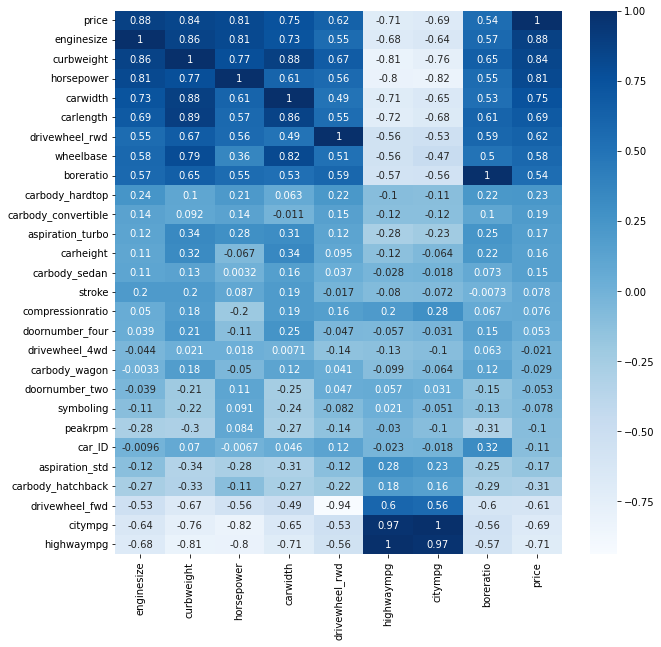

In [49]:
# Pg 393 - a heatmap for the independent variables

fig, ax = plt.subplots(figsize=(10,10))

sns.heatmap(carsTrain.corr()[['enginesize','curbweight','horsepower','carwidth',
                              'drivewheel_rwd','highwaympg','citympg','boreratio',
                              'price']].sort_values(by='price', ascending=False), 
            cmap='Blues', annot=True);


## Pg 394 - How to test different combinations of variables

### Pg 395 - An initial model that's fitted to eight independent variables

In [50]:
model = LinearRegression()
xCols = ['enginesize','curbweight','horsepower','carwidth', 'carlength',
         'drivewheel_rwd','highwaympg','citympg']

model.fit(carsTrain[xCols], carsTrain['price'])


LinearRegression()

In [51]:
# Pg 395 - score the model with the test dataset

# Store the test Score in a variable.

test_Score = model.score(carsTest[xCols], carsTest["price"])



In [52]:
# Pg 395 - score the model with the training dataset

# Store the training Score in a variable.

train_Score = model.score(carsTrain[xCols], carsTrain['price'])


In [53]:
# Printing the 2 R values.

print(f'The test R score is: \t{test_Score:.9f}')

print(f'The training R score is:\t {train_Score:.9f}')

# Printing the delta of the 2 R values.

print(f'\n\tScore delta is:\t {model.score(carsTrain[xCols], carsTrain["price"]) - model.score(carsTest[xCols], carsTest["price"]):.9f}')

The test R score is: 	0.739243731
The training R score is:	 0.834443402

	Score delta is:	 0.095199670


### Pg 395 - The initial model without the citympg column

In [54]:
model = LinearRegression()
xCols = ['enginesize','curbweight','horsepower','carwidth','carlength',
         'drivewheel_rwd','highwaympg']
model.fit(carsTrain[xCols], carsTrain['price'])

# Store the test Score in a variable.

test_Score = model.score(carsTest[xCols], carsTest["price"])


In [55]:
# Store the training Score in a variable.

train_Score = model.score(carsTrain[xCols], carsTrain['price'])


In [56]:
# Printing the 2 R values.

print(f'The test R score is: \t{test_Score:.9f}')

print(f'The training R score is:\t {train_Score:.9f}')

# Printing the delta of the 2 R values.

print(f'\n\tScore delta is:\t {model.score(carsTrain[xCols], carsTrain["price"]) - model.score(carsTest[xCols], carsTest["price"]):.9f}')

The test R score is: 	0.743094490
The training R score is:	 0.833901795

	Score delta is:	 0.090807305


### Pg 395 - A model that's fitted to all the numeric and dummy variables

In [57]:
model = LinearRegression()
xCols = carsTrain.corr().drop(columns=['price']).columns.tolist()
model.fit(carsTrain[xCols], carsTrain['price'])

# Store the test Score in a variable.

test_Score = model.score(carsTest[xCols], carsTest["price"])


In [58]:
# Store the training Score in a variable.

train_Score = model.score(carsTrain[xCols], carsTrain['price'])


In [59]:
# Printing the 2 R values.

print(f'The test R score is: \t{test_Score:.9f}')

print(f'The training R score is:\t {train_Score:.9f}')

# Printing the delta of the 2 R values.

print(f'\n\tScore delta is:\t {model.score(carsTrain[xCols], carsTrain["price"]) - model.score(carsTest[xCols], carsTest["price"]):.9f}')

The test R score is: 	0.774130945
The training R score is:	 0.893488928

	Score delta is:	 0.119357982


## Pg 396 - How to use SciKit learn to select the variables

In [60]:
# Pg 397 - import additional SciKit-learn classes

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression


In [61]:
# Pg 397 - Step 1: split the data and drop non-numeric columns

carsTrain, carsTest = train_test_split(carsDummies.drop(
    columns=['CarName','fueltype','enginelocation','cylindernumber',
             'fuelsystem','enginetype']), test_size=0.2, random_state=20)


In [62]:
# Pg 397 - Step 2: create the feature selector and fit the data to it.

fs = SelectKBest(score_func=mutual_info_regression, k=20)
fs.fit(carsTrain.drop(columns=['price']), carsTrain['price'])


SelectKBest(k=20,
            score_func=<function mutual_info_regression at 0x7fa9805c4f70>)

In [63]:
# Pg 397 - Step 3: transform the training and test data.

x_train_fs = fs.transform(carsTrain.drop(columns=['price']))
x_test_fs = fs.transform(carsTest.drop(columns=['price']))


In [64]:
# Pg 397 - Step 4: use the transformed data in the regression, score the test dataset

model = LinearRegression()
model.fit(x_train_fs, carsTrain['price'])
model.score(x_test_fs, carsTest['price'])


0.7730268917681571

In [65]:
# Pg 397 - score the training data set.

model.score(x_train_fs, carsTrain['price'])


0.8826996202377456

In [66]:
# Pg 397 - How to display the importance of each feature

df1 = pd.DataFrame(carsTrain.drop(columns=['price']).columns, columns=['feature'])
df2 = pd.DataFrame(fs.scores_, columns=['importance'])
importance = df1.join(df2)

importance.sort_values('importance', ascending=False).head()


,feature,importance
6,curbweight,0.903360
11,horsepower,0.873684
14,highwaympg,0.871452
7,enginesize,0.856551
13,citympg,0.733899


## Pg 398 How to select the right number of variables

In [67]:
# Pg 399 - How to use a for loop to score the model for varying numbers of features.

model = LinearRegression()
testScores = []
trainScores = []

for i in range(1, len(carsTrain.columns)):
    fs = SelectKBest(score_func=mutual_info_regression, k=i)
    fs.fit(carsTrain.drop(columns=['price']), carsTrain['price'])

    x_train_fs = fs.transform(carsTrain.drop(columns=['price']))
    x_test_fs = fs.transform(carsTest.drop(columns=['price']))

    model.fit(x_train_fs, carsTrain['price'])
    
    testScore = model.score(x_test_fs, carsTest['price'])
    trainScore = model.score(x_train_fs, carsTrain['price'])
    testScores.append(testScore)
    trainScores.append(trainScore)
    

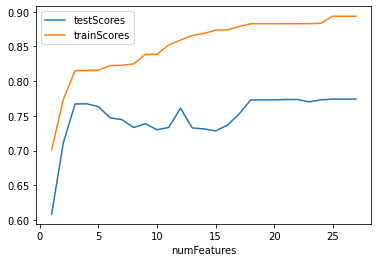

In [68]:
# Pg 399 - How to plot the test and training scores

df = pd.DataFrame(data={'testScores':testScores, 'trainScores':trainScores})
df.reset_index(inplace=True)
df.rename(columns={'index':'numFeatures'}, inplace=True)
df.numFeatures = df.numFeatures + 1
df.plot(x='numFeatures', y=['testScores','trainScores']);

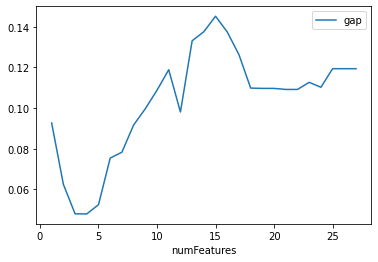

In [69]:
# Pg 399 - Or, if you only want to plot the gap, you could do it like this...

df['gap'] = df['trainScores'] - df['testScores']
df.plot(x='numFeatures', y=['gap']);

In [70]:
df.head(20)

,numFeatures,testScores,trainScores,gap
0,1,0.608708,0.701379,0.092671
1,2,0.711521,0.774061,0.062540
2,3,0.767103,0.815141,0.048037
3,4,0.767383,0.815386,0.048002
4,5,0.763173,0.815719,0.052546
5,6,0.747073,0.822507,0.075434
6,7,0.744563,0.822889,0.078325
7,8,0.733167,0.824847,0.091679
8,9,0.738644,0.838340,0.099696
9,10,0.729937,0.838736,0.108798
